### DATA PROCESSING

Clean and prepare the 'fraud_train' and 'fraud_test.csv' files from the Sparkov Simulated Transactions Dataset

## Inspect initial rows

First I'll look import both the 'fraudTrain.csv' and 'fraudTest.csv' files, join them together and look at the first 5 rows to see the column names, the data types, and any obvious issues

In [2]:
#import libraries
import pandas as pd
import numpy as np
from pathlib import Path

#create variable for path to files
RAW = Path("../data/raw/sparkov")

#read both files
train = pd.read_csv(RAW/"fraudTrain.csv", nrows=2500)
test  = pd.read_csv(RAW/"fraudTest.csv",  nrows=2500)

#concatonate the files and print first 5 rows
#ignore index so we dont get duplicate indexes (as both files start with index 0)
sample = pd.concat([train, test], ignore_index=True)
sample.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:

#get datatypes for each column
display(sample.dtypes)
#check if any of the values in the data are NULL
display(sample.isna().sum())

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
#get count of each merchant category
sample['category'].value_counts()

category
home              563
kids_pets         503
shopping_pos      450
personal_care     415
health_fitness    389
gas_transport     388
food_dining       387
grocery_pos       368
shopping_net      367
entertainment     358
misc_pos          296
misc_net          200
travel            174
grocery_net       142
Name: count, dtype: int64

## Takeaways

 - Categories ending in '_net', e.g. 'shopping_net', clearly indicate online transactions (card-not-present)
 - All other categories are likely card present transactions

So we only want to keep the card present categories

## Velocity Check on Cleaned Data

read back in the now cleaned data and check the statistics about the velocity and plot the histogram as with the caixa data

In [7]:
df_pos = pd.read_csv("../data/processed/sparkov_pos_sorted.csv",
                     parse_dates=["timestamp"])
df_pos["bucket_60s"] = df_pos["timestamp"].dt.floor("60s")
vel = (df_pos.groupby(["merchant_id","bucket_60s"])
       .card_id.nunique())
vel.describe(percentiles=[.90,.95,.99])

count    1.552924e+06
mean     1.002968e+00
std      5.452806e-02
min      1.000000e+00
50%      1.000000e+00
90%      1.000000e+00
95%      1.000000e+00
99%      1.000000e+00
max      3.000000e+00
Name: card_id, dtype: float64

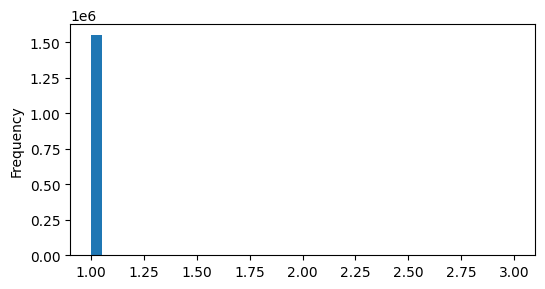

In [8]:
import matplotlib.pyplot as plt
vel.plot.hist(bins=40, figsize=(6,3))
plt.show()